In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import cPickle as pkl

In [10]:
newlines = []
with open('Electronics_5.json') as f:
    for line in f:
        line_dict = eval(line)
        newlines.append(','.join([line_dict['reviewerID'], line_dict['asin'], str(line_dict['overall']), str(line_dict['unixReviewTime'])]) + '\n')
with open('Electronics_score.csv', 'w') as f:
    f.writelines(newlines)

In [11]:
newlines = []
with open('meta_Electronics.json') as f:
    for line in f:
        line_dict = eval(line)
        newlines.append(','.join([line_dict['asin'], line_dict['categories'][-1][-1]]) + '\n')
with open('meta_Electronics_score.csv', 'w') as f:
    f.writelines(newlines)

In [20]:
df_ratings = pd.read_csv('Electronics_score.csv', names=['uid', 'iid', 'label', 'time'])
df_i2cdict = pd.read_csv('meta_Electronics_score.csv', names=['iid', 'cid'])
df_i2cdict = df_i2cdict.drop_duplicates(subset=['iid'])
item_list = df_i2cdict['iid'].tolist()
cate_list = df_i2cdict['cid'].tolist()
item_cate_dict = dict(zip(item_list, cate_list))
df_ratings['cid'] = df_ratings['iid'].map(lambda x:item_cate_dict[x])
df_ratings

,uid,iid,label,time,cid
0,AO94DHGC771SJ,0528881469,5.0,1370131200,Trucking GPS
1,AMO214LNFCEI4,0528881469,1.0,1290643200,Trucking GPS
2,A3N7T0DY83Y4IG,0528881469,3.0,1283990400,Trucking GPS
3,A1H8PY3QHMQQA0,0528881469,2.0,1290556800,Trucking GPS
4,A24EV6RXELQZ63,0528881469,1.0,1317254400,Trucking GPS
5,A2JXAZZI9PHK9Z,0594451647,5.0,1388707200,Chargers & Adapters
6,A2P5U7BDKKT7FW,0594451647,2.0,1398556800,Chargers & Adapters
7,AAZ084UMH8VZ2,0594451647,5.0,1399161600,Chargers & Adapters
8,AEZ3CR6BKIROJ,0594451647,4.0,1405036800,Chargers & Adapters
9,A3BY5KCNQZXV5U,0594451647,5.0,1390176000,Chargers & Adapters


In [21]:
# t_list = df_ratings['time'].tolist()
# min(t_list), max(t_list)
ratings = df_ratings['label'].tolist()

(array([ 108725.,   82139.,  142257.,  347041., 1009026.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

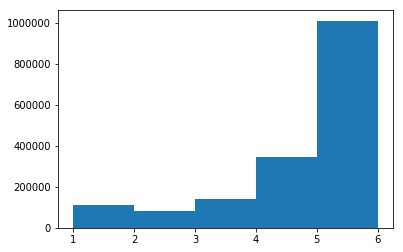

In [22]:
plt.hist(ratings, bins = range(1, 7, 1))

In [23]:
df_ratings['label'] = df_ratings['label'].map(lambda x: 1 if x == 5 else 0)

In [24]:
df_ratings

,uid,iid,label,time,cid
0,AO94DHGC771SJ,0528881469,1,1370131200,Trucking GPS
1,AMO214LNFCEI4,0528881469,0,1290643200,Trucking GPS
2,A3N7T0DY83Y4IG,0528881469,0,1283990400,Trucking GPS
3,A1H8PY3QHMQQA0,0528881469,0,1290556800,Trucking GPS
4,A24EV6RXELQZ63,0528881469,0,1317254400,Trucking GPS
5,A2JXAZZI9PHK9Z,0594451647,1,1388707200,Chargers & Adapters
6,A2P5U7BDKKT7FW,0594451647,0,1398556800,Chargers & Adapters
7,AAZ084UMH8VZ2,0594451647,1,1399161600,Chargers & Adapters
8,AEZ3CR6BKIROJ,0594451647,0,1405036800,Chargers & Adapters
9,A3BY5KCNQZXV5U,0594451647,1,1390176000,Chargers & Adapters


In [25]:
uid_key = sorted(df_ratings['uid'].unique().tolist())
uid_num = len(uid_key)
uid_map = dict(zip(uid_key, range(uid_num)))
df_ratings['uid'] = df_ratings['uid'].map(lambda x: uid_map[x])
iid_key = sorted(df_ratings['iid'].unique().tolist())
iid_num = len(iid_key)
iid_map = dict(zip(iid_key, range(uid_num, iid_num+uid_num)))
df_ratings['iid'] = df_ratings['iid'].map(lambda x: iid_map[x])
cid_key = sorted(df_ratings['cid'].unique().tolist())
cid_num = len(cid_key)
cid_map = dict(zip(cid_key, range(iid_num+uid_num, iid_num+uid_num+cid_num)))
df_ratings['cid'] = df_ratings['cid'].map(lambda x: cid_map[x])

In [26]:
df_ratings

,uid,iid,label,time,cid
0,176008,192403,1,1370131200,256141
1,173739,192403,0,1290643200,256141
2,134504,192403,0,1283990400,256141
3,24476,192403,0,1290556800,256141
4,57419,192403,0,1317254400,256141
5,79045,192404,1,1388707200,255560
6,86474,192404,0,1398556800,255560
7,157218,192404,1,1399161600,255560
8,162834,192404,0,1405036800,255560
9,118623,192404,1,1390176000,255560


In [27]:
uid_num, iid_num, cid_num

(192403, 63001, 800)

In [28]:
feature_size = uid_num + iid_num + cid_num

In [29]:
feature_size

256204

In [30]:
times = df_ratings['time'].tolist()
start_time = min(times)
max(times), min(times)
(max(times)-min(times))/24/3600

5519

In [31]:
t_idx = []
time_interval = 24*3600*365
for t in times:
    t_idx.append((t - start_time)/time_interval)
max(t_idx), min(t_idx)

(15, 0)

(array([3.11000e+02, 1.11700e+03, 1.94700e+03, 2.95200e+03, 3.83000e+03,
        6.93600e+03, 1.19580e+04, 2.50360e+04, 4.20080e+04, 5.87110e+04,
        8.04610e+04, 1.30046e+05, 2.05069e+05, 4.56352e+05, 6.62454e+05]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

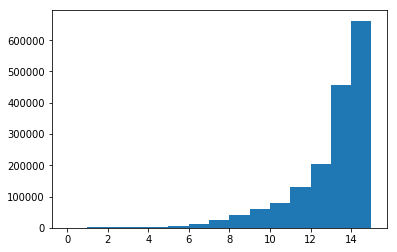

In [32]:
plt.hist(t_idx, bins=range(max(t_idx)+1))

In [33]:
df_ratings['time'] = df_ratings['time'].map(lambda x: (x-start_time)/time_interval)
df_ratings

,uid,iid,label,time,cid
0,176008,192403,1,13,256141
1,173739,192403,0,11,256141
2,134504,192403,0,11,256141
3,24476,192403,0,11,256141
4,57419,192403,0,12,256141
5,79045,192404,1,14,255560
6,86474,192404,0,14,255560
7,157218,192404,1,14,255560
8,162834,192404,0,15,255560
9,118623,192404,1,14,255560


In [17]:
#df_ratings = df_ratings.loc[df_ratings['time'].isin(range(10, 100))]
#df_ratings

In [34]:
df_ratings = df_ratings.sort_values(by=['uid', 'time'])
#df_ratings
cnt = 0
selected_uids = []
max_len = 0
for uid, content in df_ratings.groupby('uid'):
    length = len(content['time'].unique().tolist())
    if length >= 3:
        cnt += 1
        selected_uids.append(uid)
        if length > max_len:
            max_len = length
            
print(cnt)
print(max_len)

103044
16


In [35]:
df_ratings = df_ratings.loc[df_ratings['uid'].isin(selected_uids)]
df_ratings

,uid,iid,label,time,cid
75821,4,195515,0,13,255983
1072736,4,232497,0,13,255943
1332754,4,241366,1,13,255492
1483359,4,246648,1,13,255493
793828,4,222678,1,14,255448
1594973,4,251074,1,15,255644
1674472,4,254425,0,15,255518
1040472,21,231313,1,13,256015
958649,21,228488,0,14,256128
1680466,21,254797,0,14,255412


In [53]:
df_ratings_save = df_ratings.reindex(columns = ['uid','iid','cid','time','label'])
# pos_num = 0
# neg_num = 0
# for uid, hist in df_ratings_save.groupby('uid'):
#     if hist['label'].tolist()[-1] == 1:
#         pos_num += 1
#     else:
#         neg_num += 1
# print('number of pos sample: {}'.format(pos_num))
# print('number of neg sample: {}'.format(neg_num))

In [54]:
df_ratings_save['time'] = df_ratings_save['time'].map(lambda x: x)
#df_ratings_save.to_csv('Electronics_log.csv', header=False, index=False)
df_ratings_save

,uid,iid,cid,time,label
75821,4,195515,255983,13,0
1072736,4,232497,255943,13,0
1332754,4,241366,255492,13,1
1483359,4,246648,255493,13,1
793828,4,222678,255448,14,1
1594973,4,251074,255644,15,1
1674472,4,254425,255518,15,0
1040472,21,231313,256015,13,1
958649,21,228488,256128,14,0
1680466,21,254797,255412,14,0


In [56]:
df_ratings_save_pos = df_ratings_save.loc[df_ratings['label'] == 1]
df_ratings_save_neg = df_ratings_save.loc[df_ratings['label'] == 0]

item_list = df_ratings_save['iid'].unique().tolist()
item_list_pos = df_ratings_save_pos['iid'].unique().tolist()
item_list_pos_dict = dict(zip(item_list_pos, range(len(item_list_pos))))
item_cate_dict = dict(zip(df_ratings_save['iid'].tolist(), df_ratings_save['cid'].tolist()))


cnt = 0
selected_uids = []
max_len = 0
for uid, content in df_ratings_save_pos.groupby('uid'):
    length = len(content['time'].unique().tolist())
    if length >= 3:
        cnt += 1
        selected_uids.append(uid)
        if length > max_len:
            max_len = length
            
print(cnt)
print(max_len)

59925
16


In [57]:
df_ratings_save_pos = df_ratings_save_pos.loc[df_ratings_save_pos['uid'].isin(selected_uids)]
df_ratings_save_pos

,uid,iid,cid,time,label
1332754,4,241366,255492,13,1
1483359,4,246648,255493,13,1
793828,4,222678,255448,14,1
1594973,4,251074,255644,15,1
626003,32,216706,255866,13,1
530136,32,213381,256147,14,1
760960,32,221609,255754,14,1
1088351,32,233148,255560,15,1
604811,34,216025,255787,13,1
677182,34,218368,256019,14,1


In [58]:
user_neg_dict = {}
for uid, hist in df_ratings_save_neg.groupby('uid'):
    uid = str(uid)
    user_neg_dict[uid] = []
    for iid in hist['iid'].tolist():
        if iid in item_list_pos_dict:
            user_neg_dict[uid].append([str(iid), str(item_cate_dict[iid])])
    if len(user_neg_dict[uid]) >= 4:
        user_neg_dict[uid] = user_neg_dict[uid][:4]
    else:
        for i in range(4 - len(user_neg_dict[uid])):
            rand_idx = random.randint(0, len(item_list_pos) - 1)
            user_neg_dict[uid].append([str(item_list_pos[rand_idx]), str(item_cate_dict[item_list_pos[rand_idx]])])        

In [59]:
for uid in df_ratings_save_pos['uid'].unique().tolist():
    uid = str(uid)
    if uid not in user_neg_dict:
        user_neg_dict[uid] = []
        for i in range(4):
            rand_idx = random.randint(0, len(item_list_pos) - 1)
            user_neg_dict[uid].append([str(item_list_pos[rand_idx]), str(item_cate_dict[item_list_pos[rand_idx]])])        

In [60]:
len(df_ratings_save_pos['uid'].unique().tolist())

59925

In [61]:
len(user_neg_dict.keys())

103044

In [62]:
user_neg_dict['4']

[['195515', '255983'],
 ['232497', '255943'],
 ['254425', '255518'],
 ['194662', '255599']]

In [63]:
with open('user_neg_dict.pkl', 'w') as f:
    pkl.dump(user_neg_dict, f)

In [64]:
len(df_ratings_save_pos['uid'].tolist())

483086

In [65]:
for u in user_neg_dict.keys():
    for tup in user_neg_dict[u]:
        if int(tup[0]) not in item_list_pos:
            print('WRONG')
            break
    break

In [66]:
df_ratings_save_pos.to_csv('Electronics_log.csv', header=False, index=False)

In [67]:
lens = []
for uid, hist in df_ratings_save_pos.groupby('uid'):
    lens.append(len(hist['time'].unique().tolist()))

In [68]:
tlist = df_ratings_save_pos['time'].tolist()
max(tlist)
#min(tlist)

15

In [69]:
max(lens)

16